# **PRACTICAL DATA SCIENCE**

**GROUP 3**

*   Kalpavruksha, Rohan Niranjan
*   Jangareddi, Paul Rohit
*   Jadhav, Poonam
*   Gummadi, Sri Harshitha

**1. DATA LOADING**

In [1]:
!pip install yfinance

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

# Start and End date
stock_symbol = 'INTL'
start_date = '1995-01-01'
end_date = '2024-01-01'

# Dataset download
df = yf.download(stock_symbol, start=start_date, end=end_date)

print(df.head())

[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          INTL       INTL       INTL       INTL   
Date                                                                    
2022-12-02 00:00:00+00:00  19.287876  20.200001  20.379999  20.000000   
2022-12-05 00:00:00+00:00  19.031975  19.931999  20.100000  19.900000   
2022-12-06 00:00:00+00:00  19.019564  19.919001  19.975000  19.840000   
2022-12-07 00:00:00+00:00  18.965136  19.862000  19.940001  19.799999   
2022-12-08 00:00:00+00:00  19.123640  20.028000  20.059999  19.980000   

Price                           Open   Volume  
Ticker                          INTL     INTL  
Date                                           
2022-12-02 00:00:00+00:00  20.000000  1383500  
2022-12-05 00:00:00+00:00  20.070000    17900  
2022-12-06 00:00:00+00:00  19.910000   165200  
2022-12-07 00:00:00+00:00  19.850000    28900  
2022-12-08 00:00:00+00:00  20.059999    75600  


**2.DATA PRE-PROCESSING**

In [3]:
#Check for null values
df.isnull().sum()

,,0
Price,Ticker,
Adj Close,INTL,0
Close,INTL,0
High,INTL,0
Low,INTL,0
Open,INTL,0
Volume,INTL,0


In [4]:
# Convert 'Date' column to DateTime format
df.reset_index(inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

missing_values = df.isnull().sum()

missing_values

,,0
Price,Ticker,
Adj Close,INTL,0
Close,INTL,0
High,INTL,0
Low,INTL,0
Open,INTL,0
Volume,INTL,0


**3. EXPLORATORY DATA ANALYSIS**

In [5]:
# Display basic info
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 270 entries, 2022-12-02 00:00:00+00:00 to 2023-12-29 00:00:00+00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, INTL)  270 non-null    float64
 1   (Close, INTL)      270 non-null    float64
 2   (High, INTL)       270 non-null    float64
 3   (Low, INTL)        270 non-null    float64
 4   (Open, INTL)       270 non-null    float64
 5   (Volume, INTL)     270 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 14.8 KB
None


In [6]:
# Summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
Price    Adj Close       Close        High         Low        Open  \
Ticker        INTL        INTL        INTL        INTL        INTL   
count   270.000000  270.000000  270.000000  270.000000  270.000000   
mean     20.143467   20.664648   20.736148   20.589307   20.664881   
std       0.778878    0.715282    0.709804    0.715567    0.709576   
min      18.619482   19.075001   19.250000   19.030001   19.160000   
25%      19.647935   20.160250   20.251750   20.070750   20.172500   
50%      20.161560   20.702499   20.765000   20.625000   20.693500   
75%      20.590867   21.107501   21.160000   20.997500   21.080000   
max      22.241955   22.306999   22.370001   22.270000   22.350000   

Price         Volume  
Ticker          INTL  
count   2.700000e+02  
mean    2.693519e+04  
std     1.009264e+05  
min     4.000000e+02  
25%     3.600000e+03  
50%     7.200000e+03  
75%     1.587500e+04  
max     1.383500e+06  


**4. DATA VISUALIZATION**

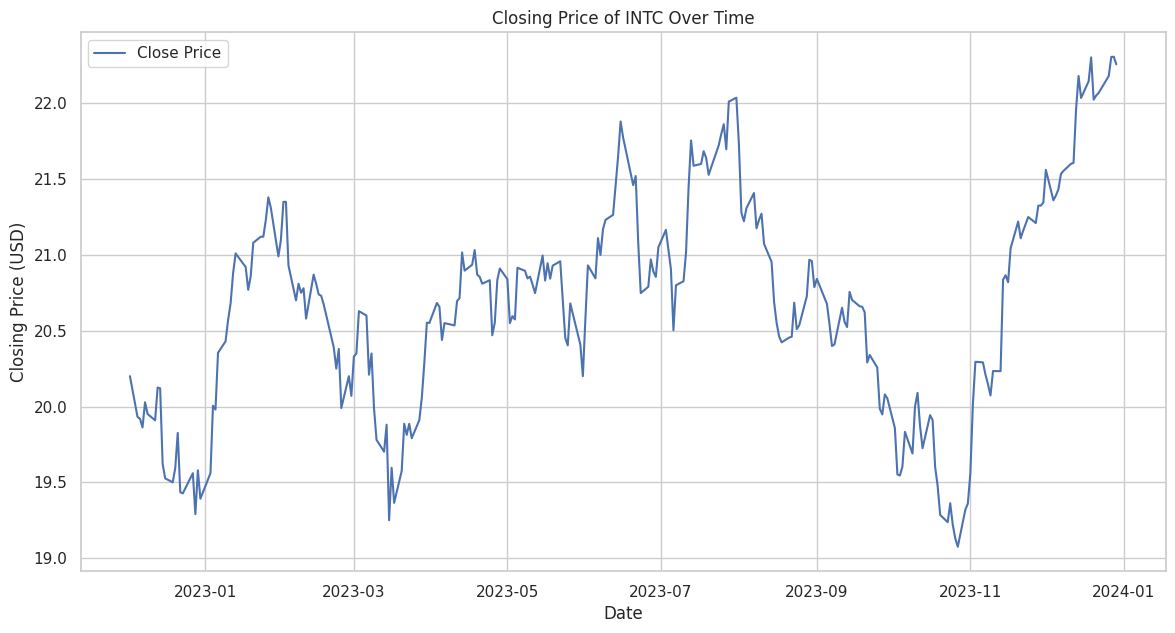

In [7]:
sns.set(style="whitegrid")

# Closing Price Over Time
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price')
plt.title('Closing Price of INTC Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

<ipython-input-8-0f3e28d2ac69>:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(df.index, df['Volume'], color='grey', linestyle='solid', marker=None, label='Volume')


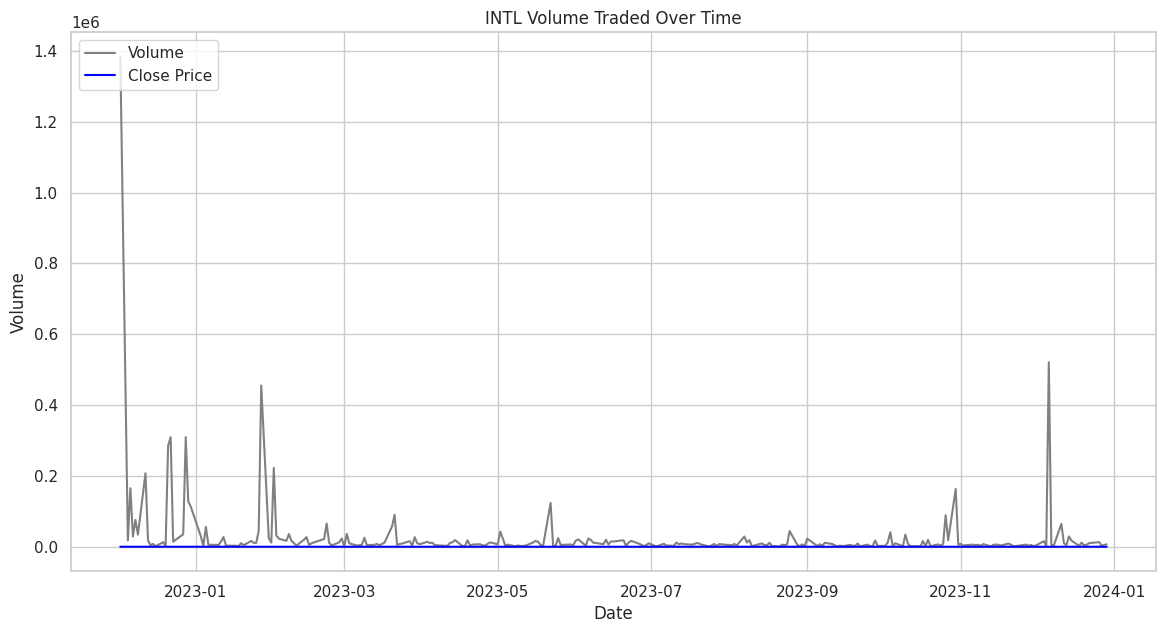

In [8]:
# Volume Traded Over Time
plt.figure(figsize=(14, 7))
plt.plot_date(df.index, df['Volume'], color='grey', linestyle='solid', marker=None, label='Volume')
plt.plot(df.index, df['Close'], color='blue', label='Close Price')
plt.title(f'{stock_symbol} Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend(loc='upper left')
plt.show()

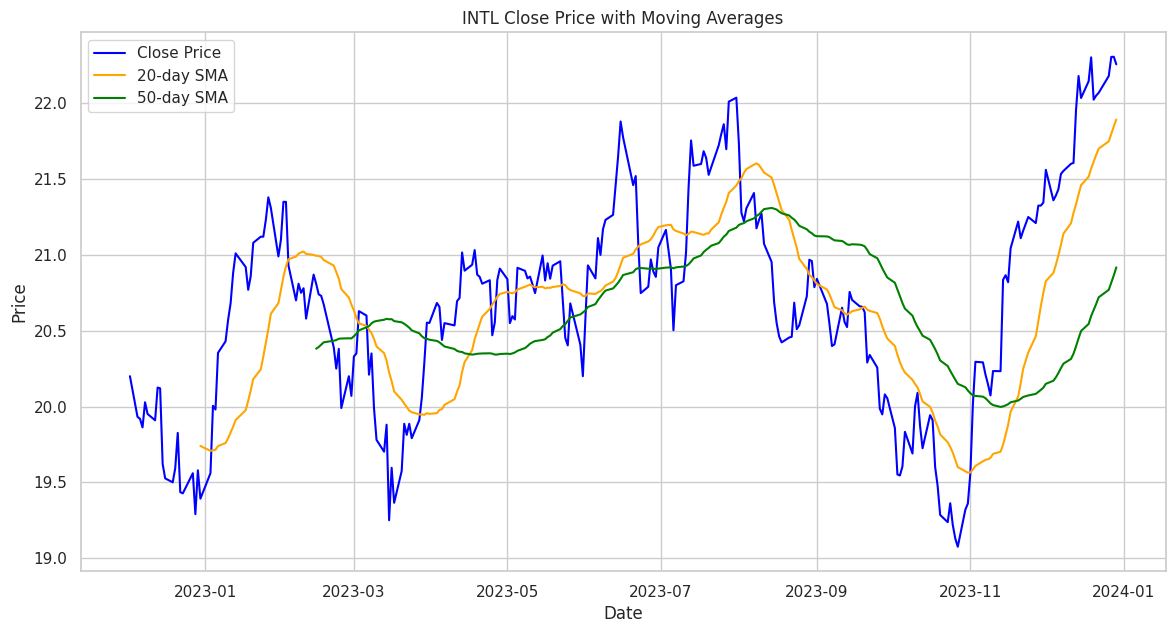

In [9]:
# Moving Averages (20-day and 50-day)
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['SMA_20'], label='20-day SMA', color='orange')
plt.plot(df['SMA_50'], label='50-day SMA', color='green')
plt.title(f'{stock_symbol} Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

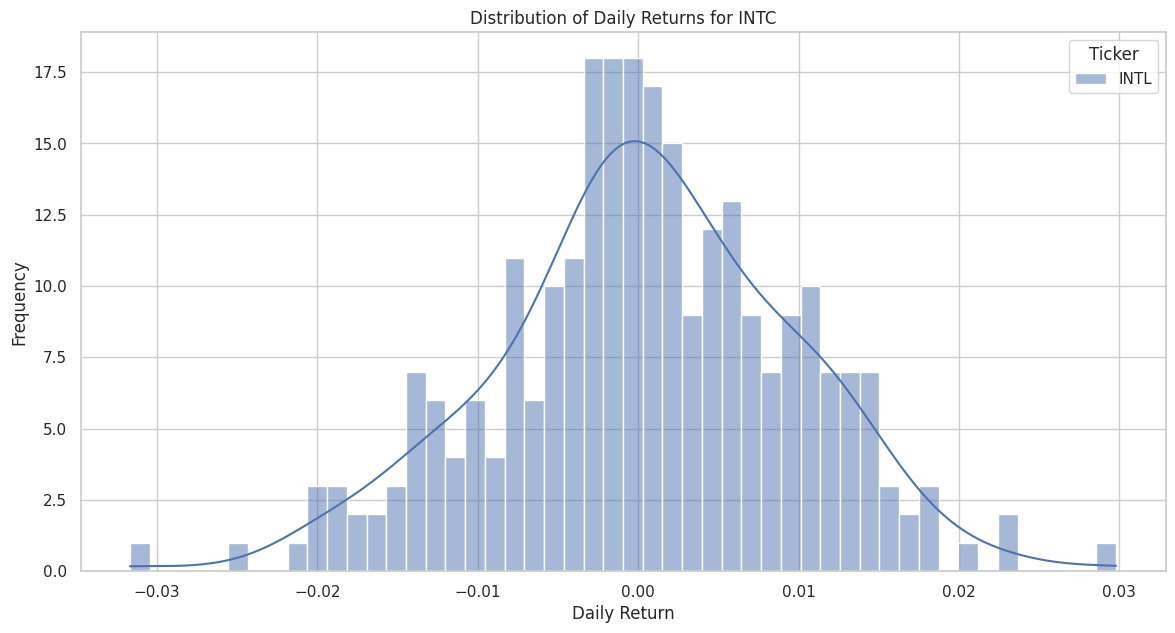

In [10]:
# Distribution of Daily Returns
daily_returns = df['Close'].pct_change().dropna()
plt.figure(figsize=(14, 7))
sns.histplot(daily_returns, kde=True, bins=50, color='skyblue')
plt.title('Distribution of Daily Returns for INTC')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

**5. TRADING STRATEGIES**

In [11]:
import numpy as np

df['Target_Strategy_1'] = np.where(df['Close'].shift(-1) > df['Close'], 1, -1)

df['50_MA'] = df['Close'].rolling(window=50).mean()
df['200_MA'] = df['Close'].rolling(window=200).mean()

df['Target_Strategy_2'] = np.where(df['50_MA'] > df['200_MA'], 1, -1)

df_cleaned = df.dropna()

df_cleaned.head()

Price,Adj Close,Close,High,Low,Open,Volume,SMA_20,SMA_50,Target_Strategy_1,50_MA,200_MA,Target_Strategy_2
Ticker,INTL,INTL,INTL,INTL,INTL,INTL,,,,,,
Date,,,,,,,,,,,,
2023-09-20 00:00:00+00:00,20.251909,20.622000,20.820000,20.622000,20.764999,2100,20.65895,21.05632,-1,21.05632,20.67693,1
2023-09-21 00:00:00+00:00,19.925869,20.290001,20.499001,20.290001,20.499001,9200,20.63920,21.03330,1,21.03330,20.67738,1
2023-09-22 00:00:00+00:00,19.974970,20.340000,20.450001,20.340000,20.379999,1100,20.63070,21.00500,-1,21.00500,20.67942,1
2023-09-25 00:00:00+00:00,19.893459,20.257000,20.285000,20.180000,20.180000,6200,20.61675,20.97838,-1,20.97838,20.68111,1
2023-09-26 00:00:00+00:00,19.627323,19.986000,20.129999,19.986000,20.129999,1300,20.57970,20.94610,-1,20.94610,20.68173,1


**6.SPLITTING THE DATA INTO TRAIN N TEST**

In [12]:
from sklearn.model_selection import train_test_split

# For Strategy 1
X1 = df_cleaned[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y1 = df_cleaned['Target_Strategy_1']

# Split the data into training and testing sets for Strategy 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# For Strategy 2
X2 = df_cleaned[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y2 = df_cleaned['Target_Strategy_2']

# Split the data into training and testing sets for Strategy 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape), (X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)

(((56, 6), (15, 6), (56,), (15,)), ((56, 6), (15, 6), (56,), (15,)))

**7.APPLY KNN**

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Apply KNN for Strategy 1
knn1 = KNeighborsClassifier()
knn1.fit(X1_train, y1_train)
y1_pred_knn = knn1.predict(X1_test)
accuracy1_knn = accuracy_score(y1_test, y1_pred_knn)

# Apply KNN for Strategy 2
knn2 = KNeighborsClassifier()
knn2.fit(X2_train, y2_train)
y2_pred_knn = knn2.predict(X2_test)
accuracy2_knn = accuracy_score(y2_test, y2_pred_knn)

(accuracy1_knn, accuracy2_knn)

(0.4, 0.6666666666666666)

**Strategy 1 Accuracy: 40%
Strategy 2 Accuracy: 66.67%**


**8. APPLY RANDOM FOREST CLASSIFIER**

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Apply Random Forest for Strategy 1
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X1_train, y1_train)
y1_pred_rf = rf1.predict(X1_test)
accuracy1_rf = accuracy_score(y1_test, y1_pred_rf)

# Apply Random Forest for Strategy 2
rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X2_train, y2_train)
y2_pred_rf = rf2.predict(X2_test)
accuracy2_rf = accuracy_score(y2_test, y2_pred_rf)

(accuracy1_rf, accuracy2_rf)

(0.7333333333333333, 0.6666666666666666)

**Strategy 1 Accuracy: 73.34%
Strategy 2 Accuracy: 66.67%**

**7.APPLY GRADIENT BOOST**

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Define Strategy 1 target: Close price increase/decrease from the previous day
df['Target_Strategy_1'] = np.where(df['Close'] > df['Close'].shift(1), 1, -1)

# Drop the first row in both X1 and y1 to ensure consistency
X1 = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].iloc[1:]  # Drop first row to match y1
y1 = df['Target_Strategy_1'].iloc[1:]  # Drop first row

# Check class distribution in Strategy 1 to ensure balance
print("Class distribution in y for Strategy 1:")
print(y1.value_counts())

# Split data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)

# Instantiate and train Gradient Boosting model
gb1 = GradientBoostingClassifier(random_state=42)
gb1.fit(X1_train, y1_train)

# Make predictions and calculate accuracy for Strategy 1
y1_pred_gb = gb1.predict(X1_test)
accuracy1_gb = accuracy_score(y1_test, y1_pred_gb)

print("Gradient Boosting Model Accuracy for Strategy 1:", accuracy1_gb)


Class distribution in y for Strategy 1:
Target_Strategy_1
 1    137
-1    132
Name: count, dtype: int64
Gradient Boosting Model Accuracy for Strategy 1: 0.5370370370370371


In [16]:
# Try a different window length for the moving averages
df['20_MA'] = df['Close'].rolling(window=20, min_periods=1).mean()
df['100_MA'] = df['Close'].rolling(window=100, min_periods=1).mean()

# Update target strategy based on new moving averages
df['Target_Strategy_2'] = np.where(df['20_MA'] > df['100_MA'], 1, -1)

# Check the class distribution with the updated target strategy
print("Updated class distribution in y2:")
print(df['Target_Strategy_2'].value_counts())


Updated class distribution in y2:
Target_Strategy_2
 1    151
-1    119
Name: count, dtype: int64


In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Define features (X) and target (y)
X2 = df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']]
y2 = df['Target_Strategy_2']

# Apply SMOTE to balance the entire dataset
smote = SMOTE(random_state=42)
X2_balanced, y2_balanced = smote.fit_resample(X2, y2)

# Check class balance after SMOTE
print("Class Balance after SMOTE:\n", y2_balanced.value_counts())

# Now perform the train-test split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_balanced, y2_balanced, test_size=0.2, random_state=42)

# Train the model on the balanced data
gb2 = GradientBoostingClassifier(random_state=42)
gb2.fit(X2_train, y2_train)

# Make predictions and calculate accuracy on the test set
y2_pred_gb = gb2.predict(X2_test)
accuracy2_gb = accuracy_score(y2_test, y2_pred_gb)
print("Model Accuracy:", accuracy2_gb)


Class Balance after SMOTE:
 Target_Strategy_2
-1    151
 1    151
Name: count, dtype: int64
Model Accuracy: 0.7868852459016393


## **Accurancy of Startergy 1: 53.73%, Accuracy of Stratergy 2 is 78.68%**

**CONCLUSION:**
**For Strategy 1, Random Forest is the recommended model due to its strong accuracy. For Strategy 2, XGBoost is the best choice, providing the highest accuracy across all models. These findings suggest that different strategies benefit from different model types, likely due to variations in how each model interprets the feature patterns and interactions within each strategy.**

**10.MODEL EVALUATION**

**EVALUATION FOR KNN**

In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the K-Nearest Neighbors model
knn_model = KNeighborsClassifier()
knn_model.fit(X2_train, y2_train)

# Predict on the test set
y2_pred = knn_model.predict(X2_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y2_test, y2_pred)
conf_matrix = confusion_matrix(y2_test, y2_pred)
class_report = classification_report(y2_test, y2_pred)

# Display results
print("K-Nearest Neighbors (KNN) Model Evaluation")
print("=========================================")
print(f"Accuracy: {accuracy:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

K-Nearest Neighbors (KNN) Model Evaluation
Accuracy: 0.6066

Confusion Matrix:
[[22 10]
 [14 15]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.61      0.69      0.65        32
           1       0.60      0.52      0.56        29

    accuracy                           0.61        61
   macro avg       0.61      0.60      0.60        61
weighted avg       0.61      0.61      0.60        61



**EVALUATION FOR RANDOM FOREST CLASSIFIER**

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate Random Forest model on the first dataset
y1_pred_rf = rf1.predict(X1_test)
accuracy1_rf = accuracy_score(y1_test, y1_pred_rf)
conf_matrix1_rf = confusion_matrix(y1_test, y1_pred_rf)
class_report1_rf = classification_report(y1_test, y1_pred_rf, output_dict=True)

# Display results for the first model
print("Random Forest Model Evaluation on Dataset 1")
print("===========================================")
print(f"Accuracy: {accuracy1_rf:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix1_rf)
print("\nClassification Report:")
for label, metrics in class_report1_rf.items():
    print(f"{label}: {metrics}")

# Evaluate Random Forest model on the second dataset
y2_pred_rf = rf2.predict(X2_test)
accuracy2_rf = accuracy_score(y2_test, y2_pred_rf)
conf_matrix2_rf = confusion_matrix(y2_test, y2_pred_rf)
class_report2_rf = classification_report(y2_test, y2_pred_rf, output_dict=True)

# Display results for the second model
print("\n\nRandom Forest Model Evaluation on Dataset 2")
print("===========================================")
print(f"Accuracy: {accuracy2_rf:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix2_rf)
print("\nClassification Report:")
for label, metrics in class_report2_rf.items():
    print(f"{label}: {metrics}")

Random Forest Model Evaluation on Dataset 1
Accuracy: 0.5370

Confusion Matrix:
[[10 16]
 [ 9 19]]

Classification Report:
-1: {'precision': 0.5263157894736842, 'recall': 0.38461538461538464, 'f1-score': 0.4444444444444444, 'support': 26.0}
1: {'precision': 0.5428571428571428, 'recall': 0.6785714285714286, 'f1-score': 0.6031746031746031, 'support': 28.0}
accuracy: 0.5370370370370371
macro avg: {'precision': 0.5345864661654135, 'recall': 0.5315934065934066, 'f1-score': 0.5238095238095237, 'support': 54.0}
weighted avg: {'precision': 0.5348927875243665, 'recall': 0.5370370370370371, 'f1-score': 0.5267489711934156, 'support': 54.0}


Random Forest Model Evaluation on Dataset 2
Accuracy: 0.5738

Confusion Matrix:
[[27  5]
 [21  8]]

Classification Report:
-1: {'precision': 0.5625, 'recall': 0.84375, 'f1-score': 0.675, 'support': 32.0}
1: {'precision': 0.6153846153846154, 'recall': 0.27586206896551724, 'f1-score': 0.38095238095238093, 'support': 29.0}
accuracy: 0.5737704918032787
macro avg:

**EVALUATION FOR GRADIENT BOOSTING CLASSIFIER**

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train Gradient Boosting model
gb2 = GradientBoostingClassifier(random_state=42)
gb2.fit(X2_train, y2_train)

# Make predictions
y2_pred_gb = gb2.predict(X2_test)

# Calculate evaluation metrics
accuracy_gb = accuracy_score(y2_test, y2_pred_gb)
conf_matrix_gb = confusion_matrix(y2_test, y2_pred_gb)
class_report_gb = classification_report(y2_test, y2_pred_gb, target_names=['Decrease', 'Increase'])

# Display results
print("Gradient Boosting Model Evaluation")
print("==================================")
print(f"Accuracy: {accuracy_gb:.4f}\n")
print("Confusion Matrix:")
print(conf_matrix_gb)
print("\nClassification Report:")
print(class_report_gb)

Gradient Boosting Model Evaluation
Accuracy: 0.7869

Confusion Matrix:
[[26  6]
 [ 7 22]]

Classification Report:
              precision    recall  f1-score   support

    Decrease       0.79      0.81      0.80        32
    Increase       0.79      0.76      0.77        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



**KEY FINDINGS**

**Best Performing Model: Our analysis revealed that the Gradient Boosting Classifier (GB) emerged as the most effective model, delivering the highest accuracy in predicting the future movement of stock prices based on the implemented trading strategies. This underscores the GB model's robustness and its aptitude for capturing complex patterns in financial time series data**.

**Least Performing Model: The K-Nearest Neighbors (KNN) model, while valuable for its simplicity and ease of interpretation, lagged in performance compared to its counterparts. This highlights the challenges KNN faces in navigating the noisy and non-linear nature of stock market data**.

**Model Evaluation: Through precision, recall, and F1-score metrics, we gained deeper insights into each model's predictive performance. These evaluations were instrumental in understanding the trade-offs between sensitivity and specificity among the models**.

**Visualization Insights: Data visualizations played a crucial role in elucidating the underlying trends and patterns within the market data, as well as in comparing the performance and outcomes of our trading strategies across different models**